In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
directory_paths = [f'../data/bot1/', f'../data/bot2/', f'../data/bot3/', f'../data/bot4/']
dataframes = [[], [], [], []]
column_titles = ["Bot #", "Pass Rate", "Num of Steps", "Seed", "Q Value"]

i = 0
for directory_path in directory_paths:
    dataframe = dataframes[i]
    i += 1
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path, names=column_titles)
            dataframe.append(df)
    
    temp = dataframe[2]
    dataframe.pop(2)
    dataframe.append(temp)

In [3]:
pass_rates = [[], [], [], []]
i = 0
for dataframe in dataframes:
    pass_rate = pass_rates[i]
    i += 1
    for df in dataframe:
        true_count = (df['Pass Rate'] == True).sum()
        total = df.shape[0]
        pass_rate.append(true_count/total * 100)
        print((true_count/total) * 100)
    print('\n')

99.0
93.0
87.0
80.0
72.0
72.0
70.0
65.0
62.0
56.00000000000001
52.0


98.07692307692307
94.23076923076923
86.27450980392157
78.43137254901961
74.0
70.58823529411765
68.0
58.82352941176471
56.86274509803921
52.94117647058824
47.05882352941176


98.07692307692307
94.23076923076923
88.46153846153845
82.6923076923077
72.54901960784314
70.58823529411765
66.66666666666666
58.82352941176471
56.86274509803921
52.94117647058824
47.05882352941176


100.0
96.0
80.76923076923077
84.0
87.5
87.5
86.36363636363636
77.27272727272727
71.42857142857143
75.0
68.42105263157895




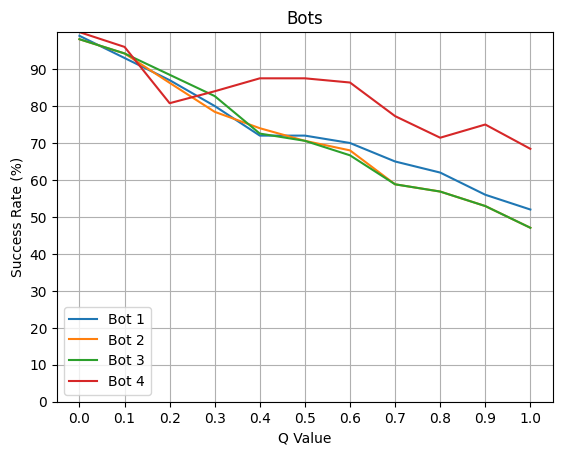

In [4]:
x = np.arange(0, 1.1, 0.1)   

i = 0
for line in pass_rates:
    label = f'Bot {i + 1}'
    i += 1
    plt.plot(x, line, label = label)
    
plt.xticks(x)
plt.yticks(np.arange(0, 100, 10)) 
plt.xlabel('Q Value')
plt.ylabel('Success Rate (%)')
plt.title('Bots')
plt.grid(True)  # Display grid lines
plt.ylim(0, 100)
plt.legend()
plt.savefig('bots.png')